<a href="https://colab.research.google.com/github/viky18096/Machine_learning/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression_Predicting Insurance Costs**

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import boxcox

In [ ]:
df = pd.read_csv('insurance.csv')

## **Exploring The Dataset**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Columns in the dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Predictor feature: (age, sex, bmi, children, smoker, region)

Predicted outcome: Charges

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df.corr()['charges']

<ipython-input-8-f833d5e32846>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['charges']


age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

array([[<Axes: title={'center': 'charges'}>]], dtype=object)

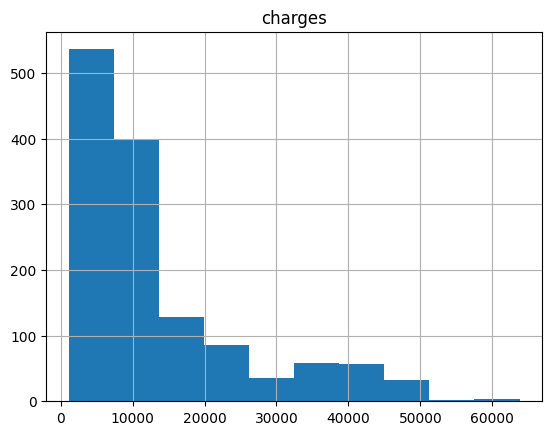

In [ ]:
df.hist("charges")

The charges column is highly skewed to the right. Extremely costly insurance charges are less common than extremely small ones. So, the errors in the model less likely to centred at zero. It might be worth it to log-transform the outcome.

array([[<Axes: title={'center': 'log_charges'}>]], dtype=object)

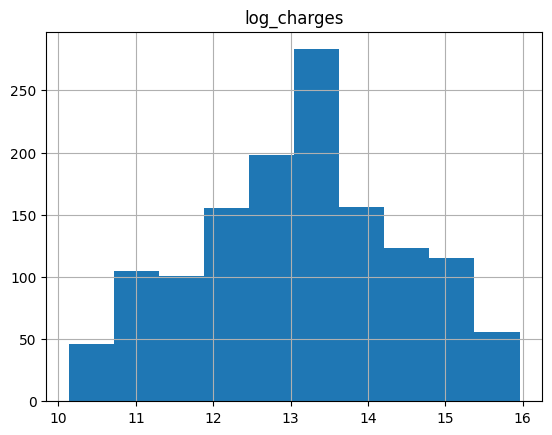

In [ ]:
df["log_charges"] = np.log2(df["charges"])

df.hist("log_charges")

The log-transformed charges values are more centered, which is what we wanted. This makes it more likely that the errors will be unbiased.

In [ ]:
# Checking the correlation between the continuous columns in the insurance data
df.corr()

<ipython-input-21-26c186307f08>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


In [ ]:
y = m*x
y = exp(m*x/100) * 100
relu
cost = (y-m*x)**2 + mx*(-100)

age has 30% correlation with charges, bmi has 19.8% correlation, and number of children has 6.7% correlation

<ipython-input-17-5fed5f1f7daa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(df.corr())


<Axes: >

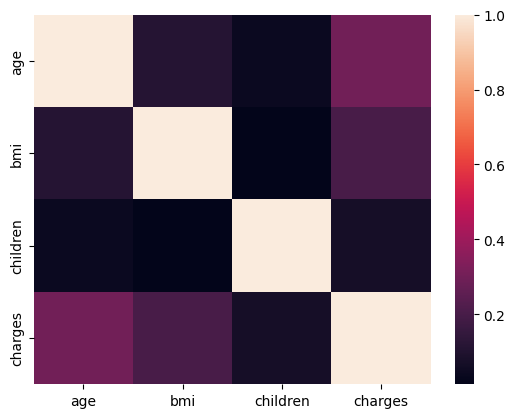

In [ ]:
#heatmap
import seaborn
seaborn.heatmap(df.corr())

<Axes: title={'center': 'log_charges'}, xlabel='sex'>

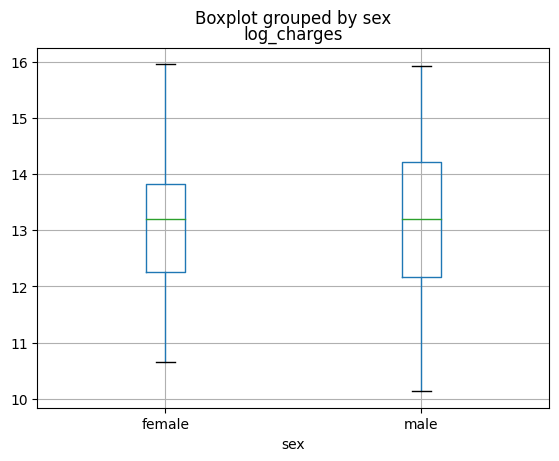

In [ ]:
df.boxplot(column = ["log_charges"], by = "sex")

<Axes: title={'center': 'log_charges'}, xlabel='smoker'>

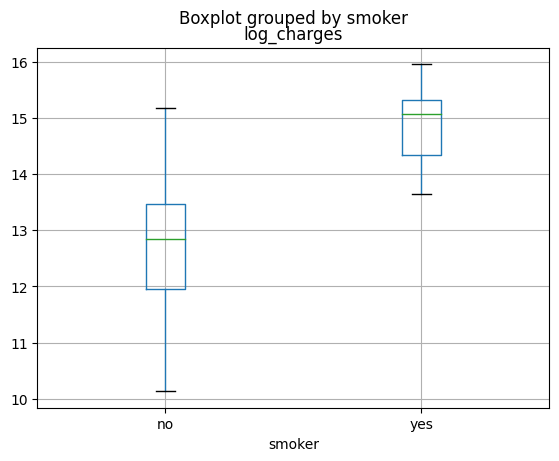

In [ ]:

df.boxplot(column = ["log_charges"], by = "smoker")

<Axes: title={'center': 'log_charges'}, xlabel='region'>

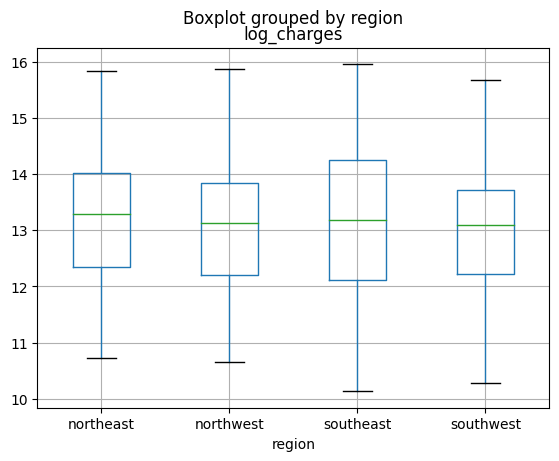

In [ ]:

df.boxplot(column = ["log_charges"], by = "region")

# Comments on plots

Males seem to have a wider distribution of charges compared to women.
Smokers have much higher costs than non-smokers. There doesn't seem to be many appreciable differences between regions.

**Dividing into Training and Test Data (Ratio of 80-20)**

In [ ]:
X = df[['age', 'bmi', 'smoker']]

X = pd.get_dummies(data = X, columns = ['smoker'], drop_first = True)

Y = df['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 730)

In [ ]:
X.head()

# Alternate way of ensuring that we get smokers = yes in the coded column

#insurance["is_smoker"] = (insurance["smoker"] == "yes") #True would be considered as 1 in the regression

,age,bmi,smoker_yes
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.05144329, 0.01640968, 2.22821728])

In [ ]:

# Get predicted values by model
y_pred = model.predict(X_train)

# MSE on the log scale for the insurance charges
mean_squared_error(y_train, y_pred)


0.43703483899651474

In [ ]:
# MSE on the original scale for the insurance charges
mse = np.exp(mean_squared_error(y_train, y_pred))
print('The MSE is', mse)

The MSE is 1.5481100107161052


In [ ]:
# Coefficient of determination
R2 = r2_score(y_train,y_pred)
print('The R square value is', R2)

The R square value is 0.7513666641041514


Training MSE for model is 0.437 and 1.548 on the original scale. The R2 indicates that model can explain 75% of variation in log-insurance charges. These preliminary results are promising, but we must remember that these are optimistic values.




# Residual Diagnostics(Checking for Model Assumptions)

<Axes: xlabel='fitted', ylabel='residuals'>

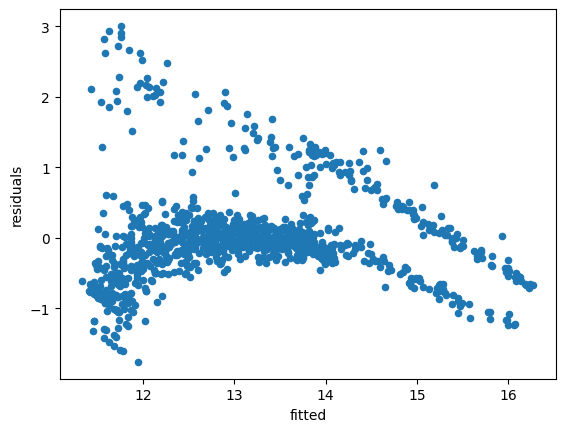

In [ ]:
# Quick visual check of residuals
check = pd.DataFrame()
check["residuals"] = y_train - y_pred
check["fitted"] = y_pred

check.plot.scatter(x = "fitted", y = "residuals")

Observations -
1. The residuals are not centered around the mean. (Assumption violated : Mean (Errors) = 0)

2. The residuals are sloping downwards. (Assumption violated : Linear Relationship between the variables and the outcome).

3. They do not have a constant band / variation. (Assumption violated : Constancy of variance of Error Terms).

These do not necessarily make the model predictions unusable, but it puts into question the linear regression assumptions.

**Interpreting The Model**

In [ ]:

intercept = model.intercept_
print(intercept)

10.146084707072207


In [ ]:
#The sequence is Áge, BMI, Smoker_yes
model.coef_


array([0.05144329, 0.01640968, 2.22821728])

In [ ]:
model_coef_regular_scale = np.exp(model.coef_)
print(model_coef_regular_scale)

[1.05278949 1.01654506 9.28330176]


1. For the  increase of every one year in age, the cost increases by 5.1%
 on log scale by keeping smoking status and bmi constant. About a 10% increase in the charges on the regular scale.

2. For the increase of 1 point in BMI, the cost increases by 16% on log scale by keeping year and smoking status constant.About a 10% increase in the charges on the regular scale.

3. If the person is the smoker, cost goes up by 222% on log scale holding age and bmi constant. About a 928% increase in the charges on the regular scale.

**Final Model Evaluation (Test Set)**

In [ ]:

predictions_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, predictions_test)
mse_train = mean_squared_error(y_train, y_pred)

mse_test = np.exp(mse_test)
mse_train = np.exp(mse_train)


print('The Training MSE is ', mse_train)
print('The Test MSE is ', mse_test)

The Training MSE is  1.5481100107161052
The Test MSE is  1.6460014987166822


Conclusion:

The test MSE was about 1.27, while the training MSE was about 1.23. In this case, the two errors are close, so we can conclude that the model is not overfit. The residuals suggest that the model is predicting much lower costs for subjects who were actually charged much higher. Therefore the model struggles with these higher costs. As a whole, the model predictions are too conservative.

We might improve the model by including more complex terms in the regression, such as interactions or quadratic terms.